In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import homogeneity_score
from functions import *

* [Importation des données](#donner)
    * [Visualisation des données](#visualisation)
* [Régression logistique](#reglog)
    * [Evaluation du modèle](#evalusationmod)
        * [Matrice de confusion](#matrice)
        * [Modèle de prédiction](#prediction)
* [Kmeans](#kmeans)
    * [Visualisation des clusters](#cluster)
    * [ Evaluation du modèle kmeans](#evkmeans)
        * [Matrice de confusion](#kmatrix)
        * [Kmeans Prédiction](#kpredict)

# Imporation des données <a class="anchor" id="donner"></a>

In [2]:
df = pd.read_csv('dataframe.csv')

In [3]:
df.drop(columns='Unnamed: 0',inplace=True)

In [4]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.0,171.81,104.86,104.95,4.52,2.89,112.83
1,1.0,171.46,103.36,103.66,3.77,2.99,113.09
2,1.0,172.69,104.48,103.50,4.40,2.94,113.16
3,1.0,171.36,103.91,103.94,3.62,3.01,113.51
4,1.0,171.73,104.28,103.46,4.04,3.48,112.54


In [5]:
df.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.483079,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.659574,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.020000,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   float64
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(7)
memory usage: 82.2 KB


In [7]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

## Visualisation des données <a class = "ancho" id= "visualisation"></a> 

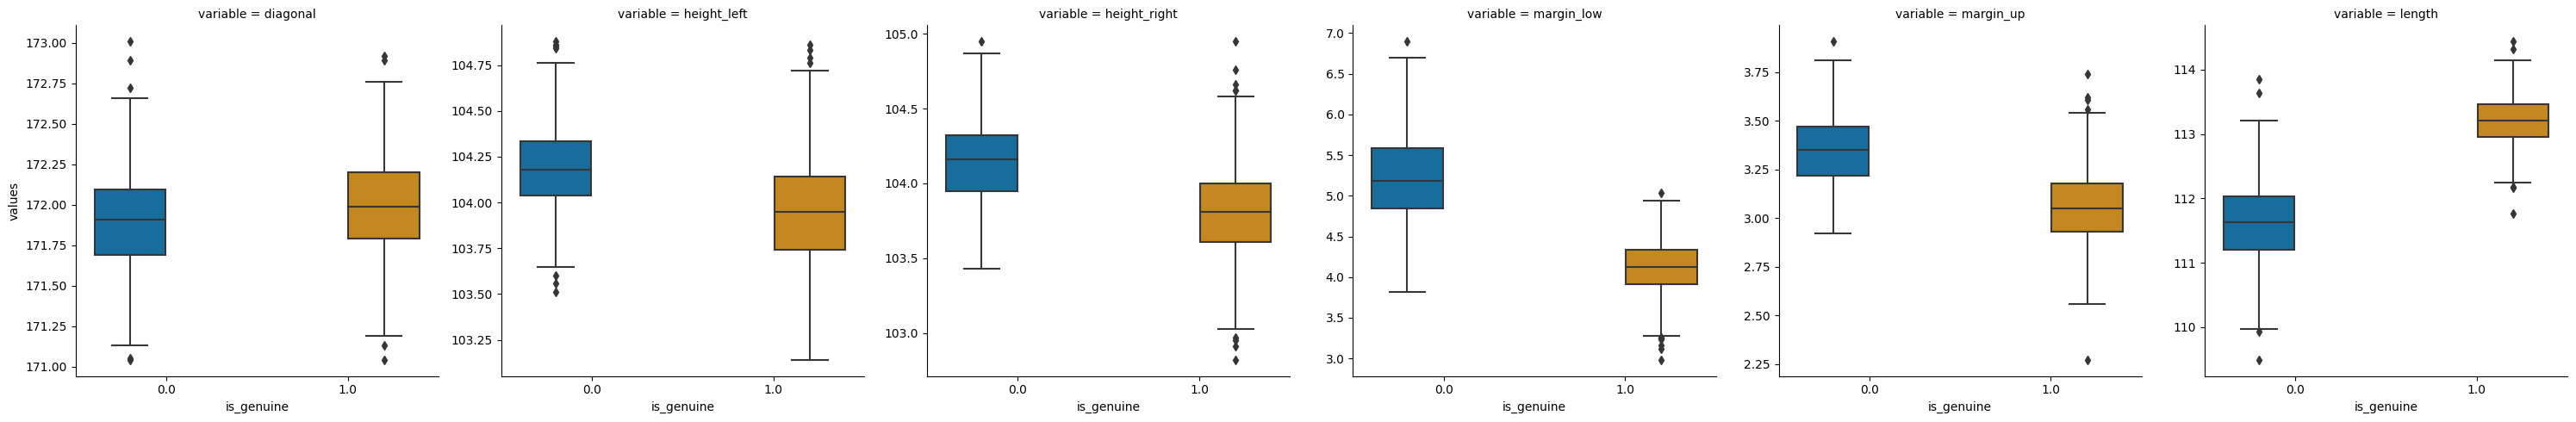

In [8]:
df_box = df.melt(id_vars='is_genuine', 
                value_vars=df[['diagonal', 'height_left', 'height_right', 'margin_low','margin_up', 'length']], 
                var_name='variable', 
                value_name='values')

sns.catplot(kind='box', data=df_box, 
            col='variable', y='values', x='is_genuine', hue='is_genuine', palette="colorblind", sharey=False)
plt.tight_layout()
plt.show()

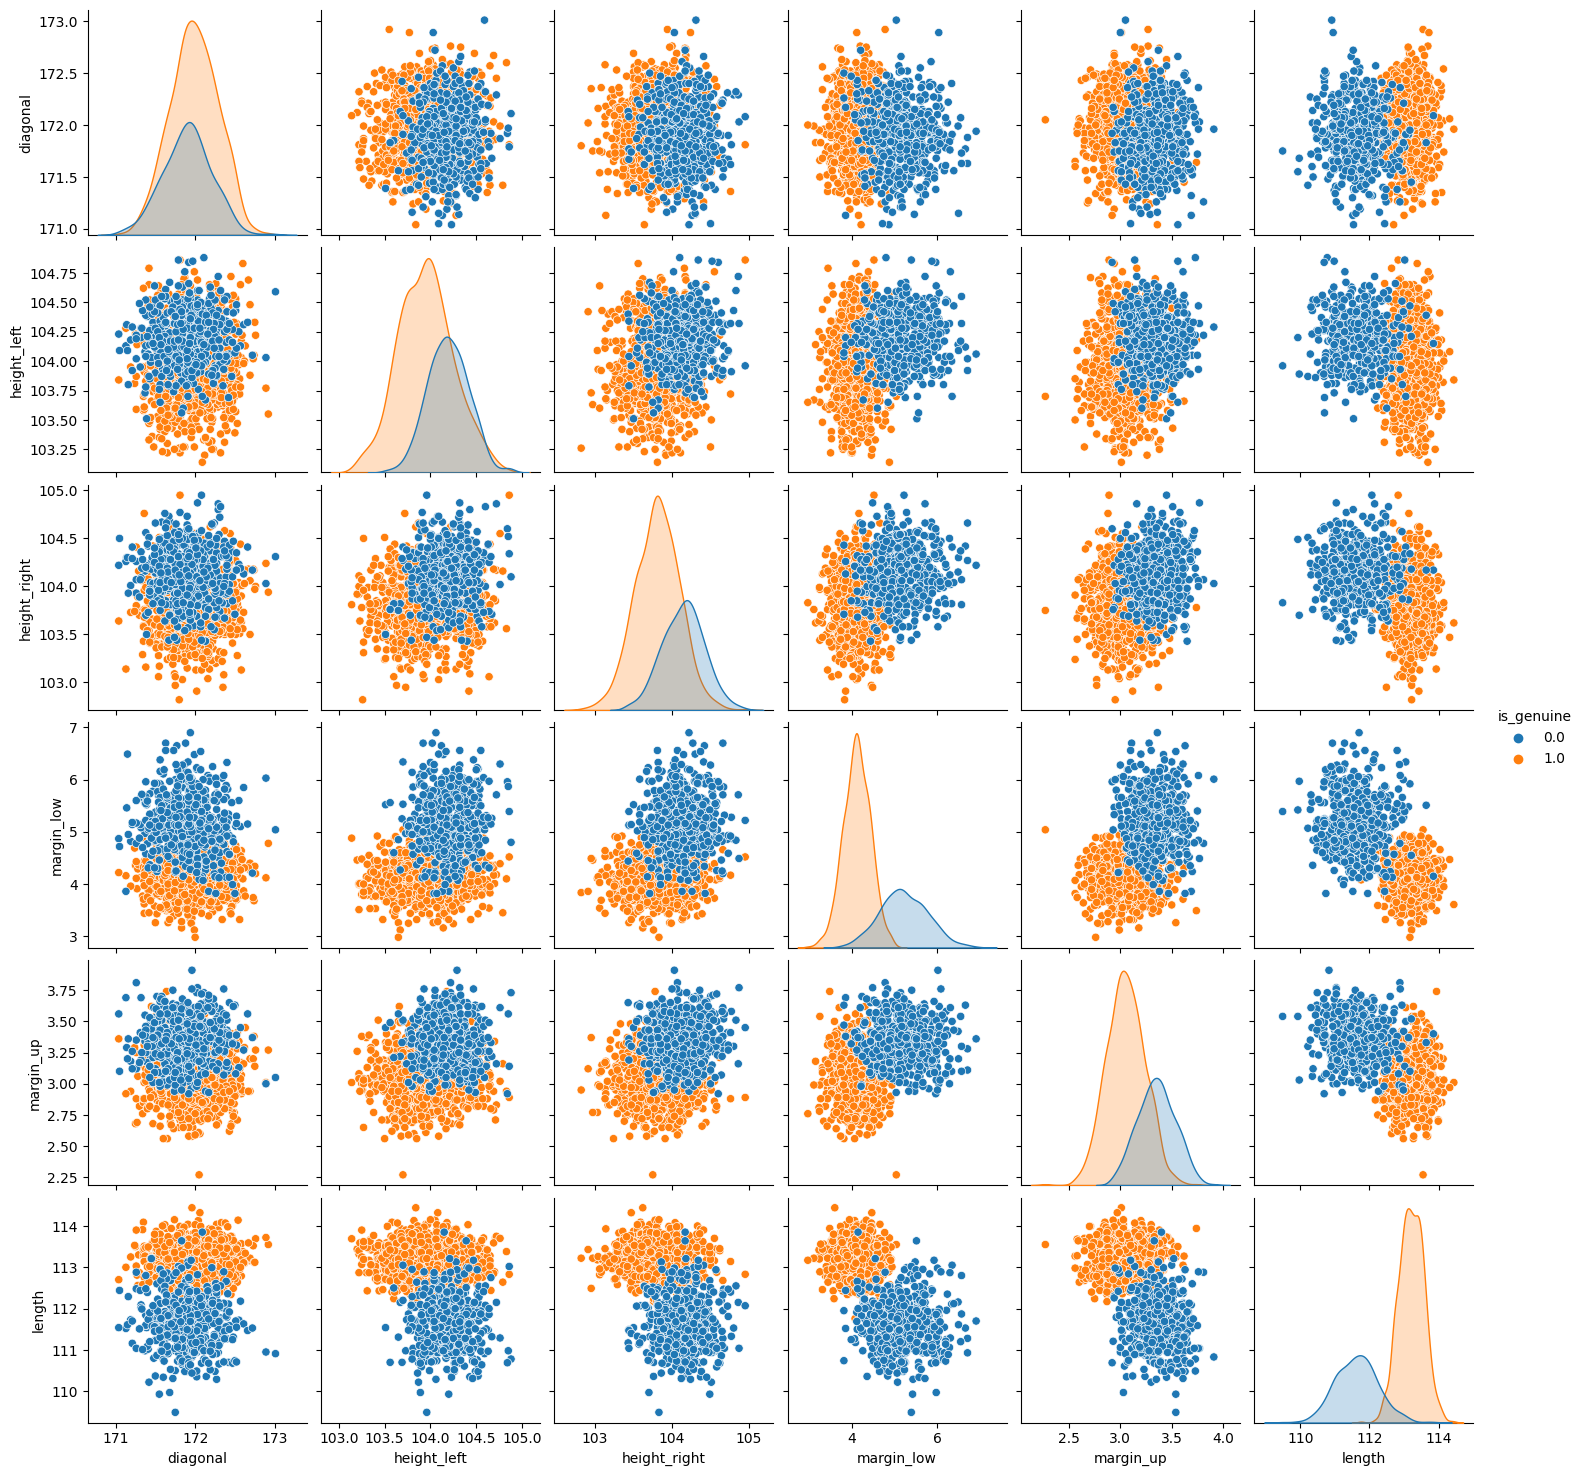

In [9]:
sns.pairplot(df, hue="is_genuine")

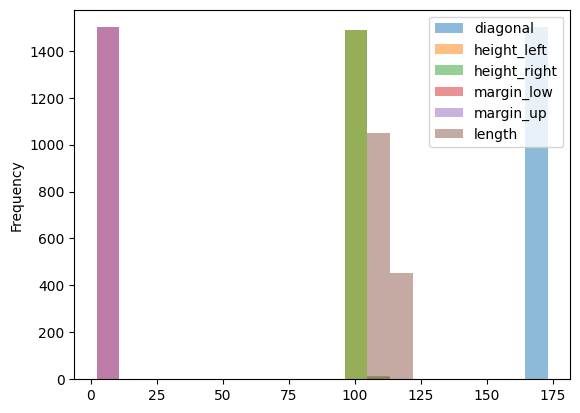

In [10]:
df.drop(columns='is_genuine').plot(kind='hist',alpha=0.5,bins=20) ; plt.show()

In [11]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [12]:
columns = ['diagonal', 'height_left', 'height_right', 'margin_low',
'margin_up', 'length']

# Régression logistique <a class ="anchor" id="reglog"></a>

je divise en variable independante -> columns et  varariable dépendante -> is_genuine

In [13]:
X = df[columns]
y = df.is_genuine

je splite mon data pour récupérer un data en 2 parties 75% du modèle sera utilisé pour entrainer le modèle et 25% pour le tester

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [15]:
reg_log = sm.Logit(y_train,X_train).fit()

print(reg_log.summary())

Optimization terminated successfully.
         Current function value: 0.031278
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1125
Model:                          Logit   Df Residuals:                     1119
Method:                           MLE   Df Model:                            5
Date:                Mon, 25 Sep 2023   Pseudo R-squ.:                  0.9507
Time:                        16:08:59   Log-Likelihood:                -35.188
converged:                       True   LL-Null:                       -713.27
Covariance Type:            nonrobust   LLR p-value:                4.318e-291
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
diagonal        -0.3797      0.801     -0.474      0.635      -1.949       1.189
height_left     -1.348

In [16]:
columns = [ 'height_left', 'height_right', 'margin_low',
'margin_up', 'length']

In [17]:
X = df[columns]
y = df.is_genuine

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [19]:
reg_log = sm.Logit(y_train,X_train).fit()

print(reg_log.summary())

Optimization terminated successfully.
         Current function value: 0.031377
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1125
Model:                          Logit   Df Residuals:                     1120
Method:                           MLE   Df Model:                            4
Date:                Mon, 25 Sep 2023   Pseudo R-squ.:                  0.9505
Time:                        16:08:59   Log-Likelihood:                -35.299
converged:                       True   LL-Null:                       -713.27
Covariance Type:            nonrobust   LLR p-value:                2.462e-292
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
height_left     -1.6276      1.101     -1.479      0.139      -3.785       0.529
height_right    -3.147

In [20]:
columns = [ 'height_right', 'margin_low',
'margin_up', 'length']

In [21]:
X = df[columns]
y = df.is_genuine

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [23]:
reg_log = sm.Logit(y_train,X_train).fit()

print(reg_log.summary())

Optimization terminated successfully.
         Current function value: 0.032355
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1125
Model:                          Logit   Df Residuals:                     1121
Method:                           MLE   Df Model:                            3
Date:                Mon, 25 Sep 2023   Pseudo R-squ.:                  0.9490
Time:                        16:08:59   Log-Likelihood:                -36.399
converged:                       True   LL-Null:                       -713.27
Covariance Type:            nonrobust   LLR p-value:                3.199e-293
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
height_right    -4.6462      0.745     -6.237      0.000      -6.106      -3.186
margin_low      -5.581

In [24]:
y_pred = reg_log.predict(X_test).round(0)

## Evaluation du modèle <a class="anchor" id="evalusationmod">

score de precision du modèle 

In [25]:
print(accuracy_score(y_test,y_pred)*100,'%')

98.66666666666667 %


### Matrice de confusion <a class="anchor" id="matrice"></a>

In [26]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[125,   4],
       [  1, 245]], dtype=int64)

In [27]:
pd_conf_matrix = pd.DataFrame(conf_matrix)
pd_conf_matrix.rename(columns={0:'False', 1:'True'}, inplace=True)
pd_conf_matrix.rename(index={0:'False', 1:'True'}, inplace=True)

Text(0.5, 427.9555555555555, 'Predicted label')

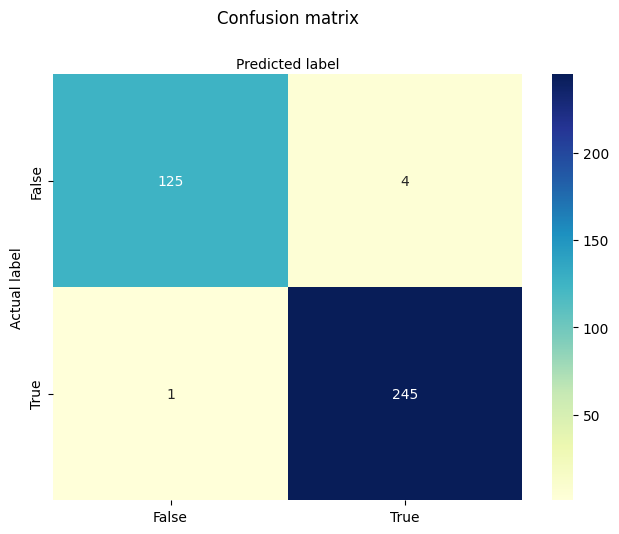

In [28]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd_conf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [29]:
from sklearn.metrics import classification_report
target_names = ['faux', 'vrai']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        faux       0.99      0.97      0.98       129
        vrai       0.98      1.00      0.99       246

    accuracy                           0.99       375
   macro avg       0.99      0.98      0.99       375
weighted avg       0.99      0.99      0.99       375



<!-- source: https://www.datacamp.com/tutorial/understanding-logistic-regression-python  -->

j'ai un bon modèle valider a 99% 

### Modèle de prédiction <a class="anchor" id="prediction"></a>

In [30]:
def regLogPredict(filename):
    df_billets = pd.read_csv(filename)
    df_prediction = df_billets[['height_right','margin_low','margin_up','length']]

    y_pred = reg_log.predict(df_prediction)
    df_billets["score"] = y_pred
    df_billets["prediction"] = df_billets.score.round(0).astype(bool)
    return df_billets

In [60]:
regLogPredict("billets_test.csv")


,diagonal,height_left,height_right,margin_low,margin_up,length,id,score,prediction
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,0.998924,True
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,0.001259,False
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,0.999929,True
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,0.000002,False
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,0.003406,False


#

#

# Kmeans <a class="anchor" id="kmeans"></a>

In [32]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [33]:
# df_copy_ = fit.transform(df_copy)
# df_copy_ = pd.DataFrame(df_copy_)
# df_copy_.columns = columns
df_copy = df[[ 'diagonal', 'height_left', 'height_right', 'margin_low','margin_up', 'length']]
df_copy.describe().round(2)

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00
mean,171.96,104.03,103.92,4.48,3.15,112.68
std,0.31,0.30,0.33,0.66,0.23,0.87
min,171.04,103.14,102.82,2.98,2.27,109.49
25%,171.75,103.82,103.71,4.02,2.99,112.03
50%,171.96,104.04,103.92,4.31,3.14,112.96
75%,172.17,104.23,104.15,4.87,3.31,113.34
max,173.01,104.88,104.95,6.90,3.91,114.44


In [34]:
kmeans = KMeans(n_clusters = 2,random_state = 0)
kmeans.fit(df_copy)

c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [35]:
kmeans.inertia_

972.0844679560987

In [36]:
inertia = []
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [37]:
for i in k_list :
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_copy) 
    inertia.append(kmeans.inertia_)
    print(inertia)

c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2307.3912083882938]
[2307.3912083882938, 972.0844679560987]
[2307.3912083882938, 972.0844679560987, 861.476521731893]


c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2307.3912083882938, 972.0844679560987, 861.476521731893, 774.8412668268153]
[2307.3912083882938, 972.0844679560987, 861.476521731893, 774.8412668268153, 714.663248417849]
[2307.3912083882938, 972.0844679560987, 861.476521731893, 774.8412668268153, 714.663248417849, 666.9171032484115]
[2307.3912083882938, 972.0844679560987, 861.476521731893, 774.8412668268153, 714.663248417849, 666.9171032484115, 631.7472411761437]


c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2307.3912083882938, 972.0844679560987, 861.476521731893, 774.8412668268153, 714.663248417849, 666.9171032484115, 631.7472411761437, 596.1662832953306]
[2307.3912083882938, 972.0844679560987, 861.476521731893, 774.8412668268153, 714.663248417849, 666.9171032484115, 631.7472411761437, 596.1662832953306, 571.986237466609]


c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


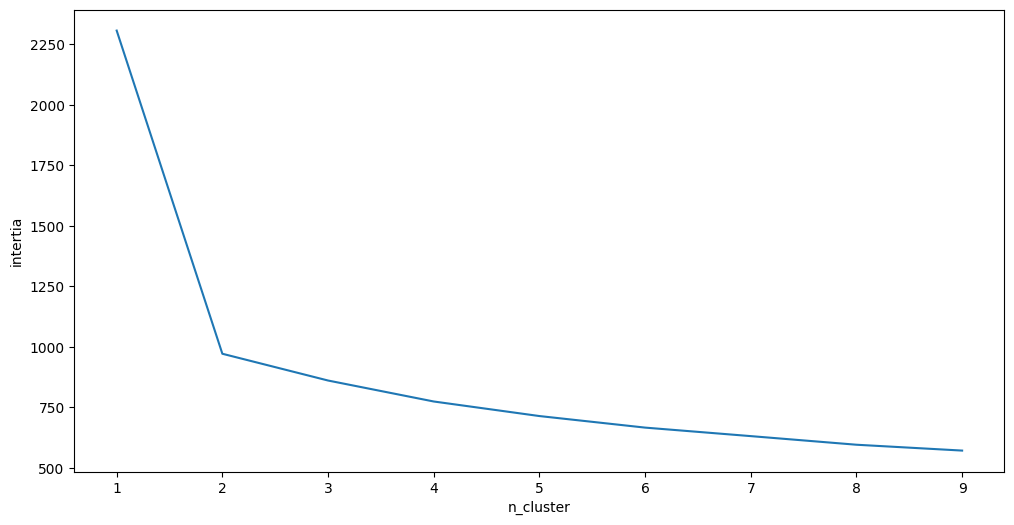

In [38]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, inertia)
plt.show()

In [39]:
kmeans = KMeans(n_clusters=2,random_state = 0)
kmeans.fit(df_copy)

c:\Users\ikram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [40]:
kmeans.labels_ 

array([0, 0, 0, ..., 1, 1, 1])

In [41]:
df_copy['cluster'] =kmeans.labels_

In [42]:
means_cluster = df_copy.groupby("cluster").mean()
means_cluster

,diagonal,height_left,height_right,margin_low,margin_up,length
cluster,,,,,,
0,171.986844,103.951839,103.813579,4.124288,3.058181,113.195329
1,171.898634,104.193126,104.145031,5.238547,3.347909,111.590269


In [43]:
df_copy.groupby('cluster').mean()/100

,diagonal,height_left,height_right,margin_low,margin_up,length
cluster,,,,,,
0,1.719868,1.039518,1.038136,0.041243,0.030582,1.131953
1,1.718986,1.041931,1.041450,0.052385,0.033479,1.115903


In [44]:
print('Cluster homogeneity: ',homogeneity_score(df.is_genuine,df_copy.cluster)*100,"%")

Cluster homogeneity:  88.74973575337256 %


## Visualisation des clusters <a class="anchor" id="cluster"></a>

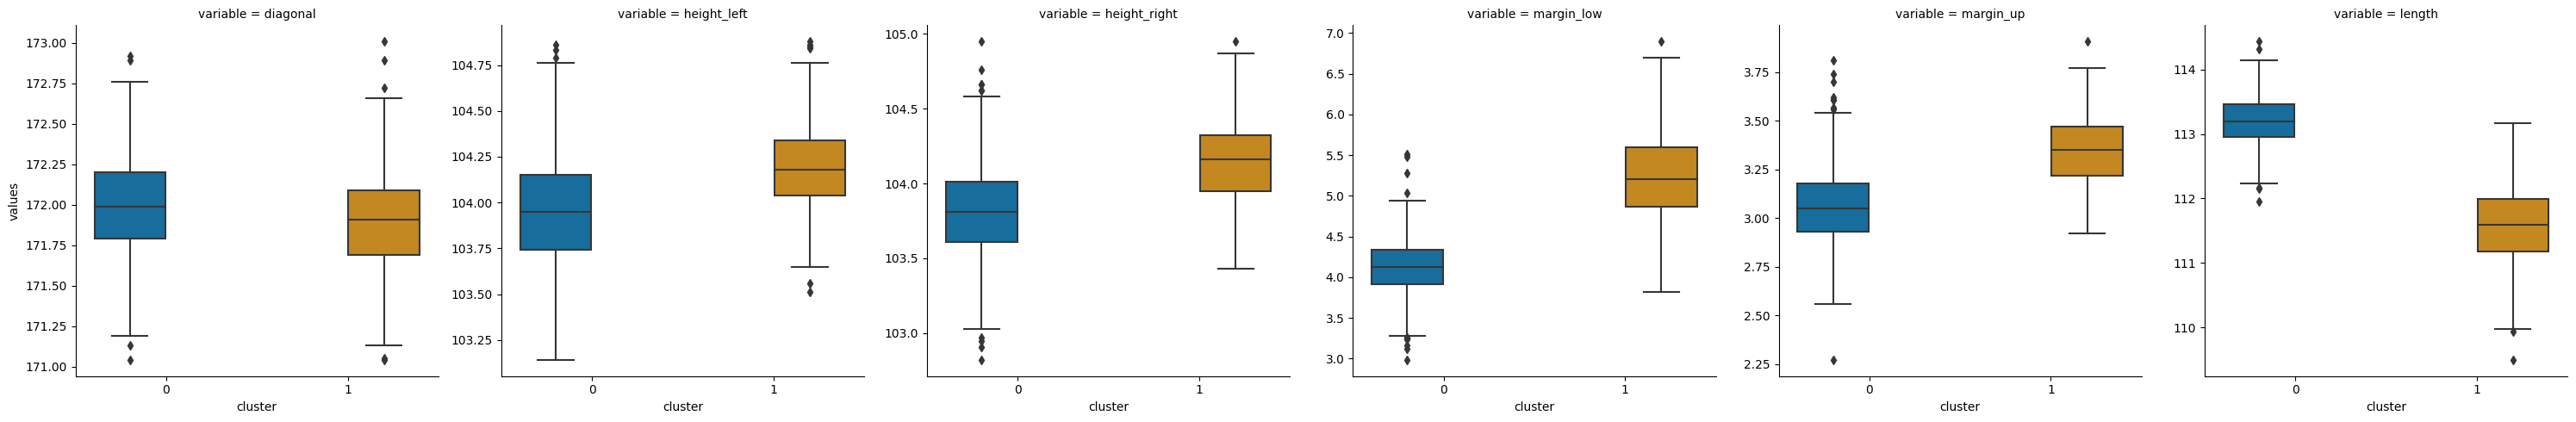

In [45]:


df_long = df_copy.melt(id_vars='cluster', value_vars=df_copy.columns[:-1], var_name='variable', value_name='values')

sns.catplot(kind='box', data=df_long, 
            col='variable', y='values', x='cluster', hue='cluster', palette="colorblind", sharey=False)
plt.tight_layout()
plt.show()


In [46]:
df_copy['is_genuine'] = df['is_genuine']

In [47]:
etiquette = df_copy.groupby('cluster').is_genuine.mean().round(0).astype(bool).to_dict()
etiquette

{0: True, 1: False}

In [48]:
df_copy.columns[:-2]

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

In [49]:
X_kmeans = df_copy[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']]
y_kmeans = df_copy.is_genuine

In [50]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_kmeans, y_kmeans, test_size=0.25, random_state=16)

In [51]:
y_pred_k = kmeans.predict(X_test_k)

## Evaluation du modèle kmeans <a class="anchor" id="evkmeans"></a>

score de précition du modèle

In [52]:
print(accuracy_score(y_test_k,y_pred_k)*100)

1.6


### Matrice de confusion <a class="anchor" id="kmatrix"></a>

In [53]:
k_matrix = metrics.confusion_matrix(y_test_k,y_pred_k)
k_matrix = k_matrix[::-1]
k_matrix


array([[246,   0],
       [  6, 123]], dtype=int64)

In [54]:
pd_k_matrix= pd.DataFrame(k_matrix)
pd_k_matrix.rename(columns={0:'True', 1:'False'}, inplace=True)
pd_k_matrix.rename(index={0:'True', 1:'False'}, inplace=True)

Text(0.5, 427.9555555555555, 'Predicted label')

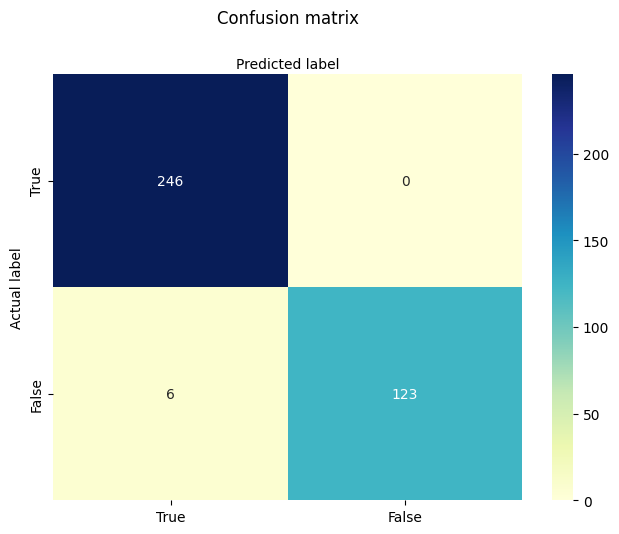

In [55]:
class_names=[1,0] # name  of classes
fig, ax = plt.subplots()
tick_marks = [1,0]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
s = sns.heatmap(pd_k_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
target_names = ['vrai', 'faux']
print(classification_report(y_test_k, y_pred_k,target_names=target_names))

              precision    recall  f1-score   support

        vrai       0.02      0.05      0.03       129
        faux       0.00      0.00      0.00       246

    accuracy                           0.02       375
   macro avg       0.01      0.02      0.02       375
weighted avg       0.01      0.02      0.01       375



In [57]:
df_copy.columns

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length', 'cluster', 'is_genuine'],
      dtype='object')

### Kmeans prédiction <a class="anchor" id="kpredict"></a>

In [58]:
def kmeansPredict(filname):
    df = pd.read_csv(filname)
    kpredict = df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']]
    y_pred_k = kmeans.predict(kpredict).round(0)
    y_pred = [etiquette[x] for x in y_pred_k]
    df['cluster']= y_pred_k
    df['prediction'] = y_pred
    return df

In [61]:
kmeansPredict("billets_test.csv")

,diagonal,height_left,height_right,margin_low,margin_up,length,id,cluster,prediction
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,0,True
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,1,False
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,0,True
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,1,False
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,1,False
